In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
df=pd.read_csv("/content/data.csv")
df

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,Basilar-type aura
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,Basilar-type aura
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,Basilar-type aura
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,Basilar-type aura


In [2]:
df.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [4]:
df.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.47000,0.987500,0.322500,0.977500,0.980000,...,0.0025,0.125000,0.060000,0.015000,0.005000,0.015000,0.0,0.017500,0.007500,0.410000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.76849,0.111242,0.468019,0.148489,0.140175,...,0.0500,0.331133,0.237784,0.121705,0.070622,0.121705,0.0,0.131289,0.086385,0.492449
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [5]:
df.isna().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

In [8]:
x=df.iloc[:,:-1].values
x

array([[30,  1,  5, ...,  0,  0,  0],
       [50,  3,  5, ...,  0,  0,  0],
       [53,  2,  1, ...,  0,  0,  0],
       ...,
       [28,  3,  2, ...,  0,  0,  1],
       [20,  3,  1, ...,  0,  1,  1],
       [37,  1,  1, ...,  1,  0,  1]])

In [9]:
y=df.iloc[:,-1].values
y

array(['Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Migraine without aura', 'Migraine without aura',
       'Migraine without aura', 'Migraine without aura',
       'Migraine without aura', 'Migraine without aura',
       'Migraine without aura', 'Migraine without aura',
       'Migraine without aura', 'Migraine without aura',
       'Migraine without aura', 'Migraine without aura',
       'Migraine without aura', 'Migraine without aura',
       'Migr

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)
xtrain

array([[15,  2,  2, ...,  0,  0,  0],
       [20,  3,  1, ...,  0,  1,  1],
       [25,  2,  2, ...,  0,  0,  0],
       ...,
       [55,  1,  1, ...,  0,  0,  1],
       [31,  1,  1, ...,  0,  0,  1],
       [22,  2,  1, ...,  0,  0,  0]])

In [12]:
scaler=StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)
xtrain

array([[-1.38795753,  0.47907014, -0.24268529, ..., -0.15456644,
        -0.08192319, -0.8221786 ],
       [-0.98549546,  1.76229372, -0.83945241, ..., -0.15456644,
        12.20655562,  1.21628074],
       [-0.58303339,  0.47907014, -0.24268529, ..., -0.15456644,
        -0.08192319, -0.8221786 ],
       ...,
       [ 1.83173904, -0.80415345, -0.83945241, ..., -0.15456644,
        -0.08192319,  1.21628074],
       [-0.1000789 , -0.80415345, -0.83945241, ..., -0.15456644,
        -0.08192319,  1.21628074],
       [-0.82451063,  0.47907014, -0.83945241, ..., -0.15456644,
        -0.08192319, -0.8221786 ]])

In [13]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(xtrain,ytrain)
ypred=classifier.predict(xtest)
ypred

array(['Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura without migraine', 'Sporadic hemiplegic migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Migraine without aura',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Migraine without aura', 'Typical aura with migraine',
       'Typical aura with migraine', 'Migraine without aura',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Sporadic hemiplegic migraine', 'Migraine without aura',
       'Sporadic hemiplegic migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Familial hemiplegic migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Migraine without aura',
       'Typical aura with migraine', 'Typical aura with migraine',
       'T

In [16]:
df.Type.unique()

array(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'], dtype=object)

In [17]:
score=accuracy_score(ytest,ypred)
score*100

84.0

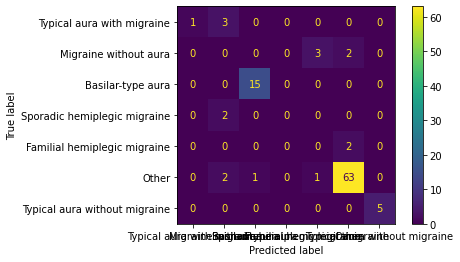

In [18]:
label=['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine']
result=confusion_matrix(ytest,ypred)
cmd=ConfusionMatrixDisplay(result,display_labels=label)
cmd.plot()

In [19]:
classifier2=GaussianNB()
classifier2.fit(xtrain,ytrain)
ypred2=classifier2.predict(xtest)
ypred2


array(['Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura without migraine', 'Familial hemiplegic migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Migraine without aura',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Migraine without aura', 'Typical aura with migraine',
       'Typical aura with migraine', 'Migraine without aura',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Familial hemiplegic migraine', 'Migraine without aura',
       'Familial hemiplegic migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
      

In [23]:
score2=accuracy_score(ytest,ypred2)
score2*100

96.0

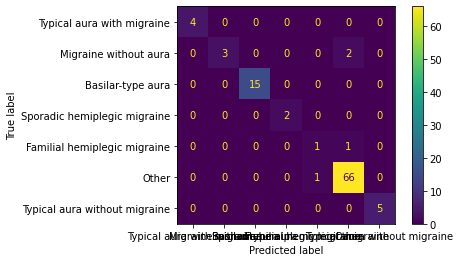

In [24]:
label2=['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine']
result2=confusion_matrix(ytest,ypred2)
cmd2=ConfusionMatrixDisplay(result2,display_labels=label2)
cmd2.plot()

In [25]:
classifier3=SVC()
classifier3.fit(xtrain,ytrain)
ypred3=classifier3.predict(xtest)
ypred3

array(['Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura without migraine', 'Sporadic hemiplegic migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Migraine without aura',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Migraine without aura', 'Typical aura with migraine',
       'Typical aura with migraine', 'Migraine without aura',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Familial hemiplegic migraine', 'Migraine without aura',
       'Sporadic hemiplegic migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
      

In [26]:
score=accuracy_score(ytest,ypred3)
score*100

92.0

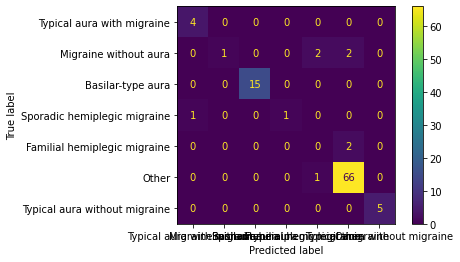

In [27]:
label3=['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine']
result3=confusion_matrix(ytest,ypred3)
cmd3=ConfusionMatrixDisplay(result3,display_labels=label)
cmd3.plot()